# Analysis of the results for the bay dataset
## Setup

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

## Results

In [2]:
result = torch.tensor(np.load("STGAN/bay/result/result.npy"), dtype=torch.float)

In [3]:
result.shape

torch.Size([6048, 365, 3])

In [4]:
camera_num = 0
feature_num = 0
day_length = int(24 * 60 / 5)
days = 3

<Axes: >

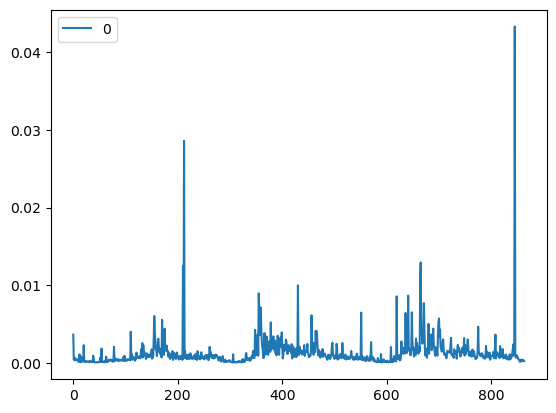

In [5]:
pd.DataFrame(result[:days*day_length, camera_num, feature_num].numpy()).plot()

<Axes: >

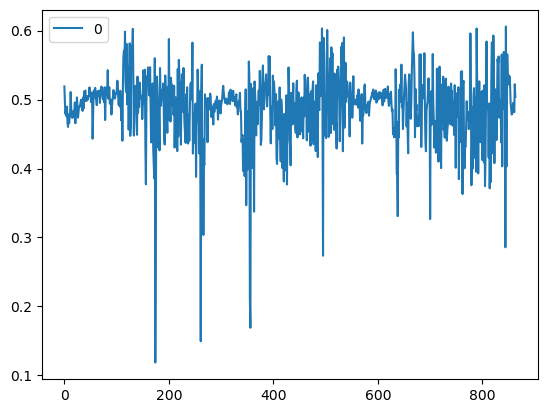

In [6]:
feature_num = 1
pd.DataFrame(result[:days*day_length, camera_num, feature_num].numpy()).plot()

<Axes: >

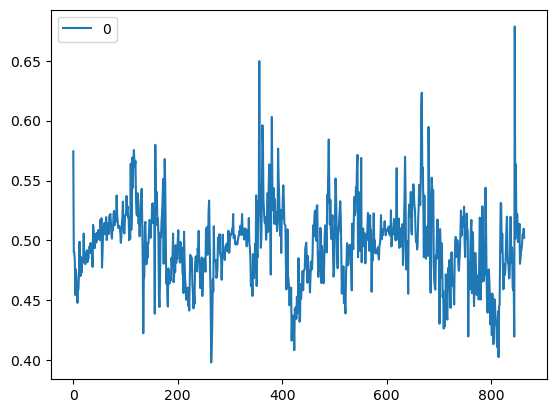

In [7]:
feature_num = 2
pd.DataFrame(result[:days*day_length, camera_num, feature_num].numpy()).plot()

## Anomaly score
Combining the two scores, from the generator and the discriminator.

In [8]:
s_G = pd.DataFrame(result[:days*day_length, camera_num, 0].numpy())
s_D = pd.DataFrame(result[:days*day_length, camera_num, 1].numpy()) - pd.DataFrame(result[:days*day_length, camera_num, 2].numpy())

In [9]:
lambda_coef = 1.0
anomaly_score = s_G + lambda_coef * s_D
anomaly_score.columns = ["Score"]


In [10]:
anomaly_score

,Score
0,-0.051750
1,0.005826
2,-0.010031
3,0.002847
4,0.021822
...,...
859,-0.001590
860,-0.015415
861,-0.021487
862,0.012764


<Axes: >

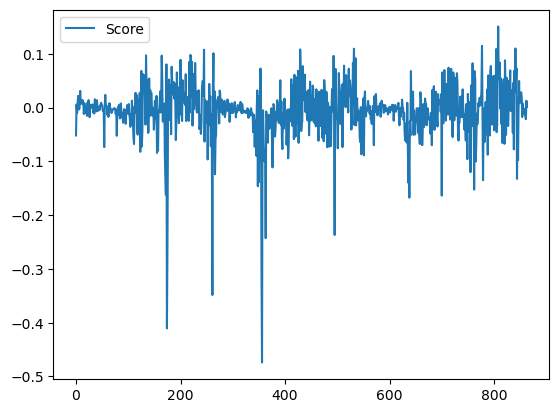

In [11]:
anomaly_score.plot()

In [12]:
anomaly_threshold = .1
anomalies = anomaly_score[anomaly_score.Score > anomaly_threshold].index
anomalies

Int64Index([245, 263, 429, 532, 777, 804, 808, 841], dtype='int64')

## Real data

In [13]:
data = torch.tensor(np.load("STGAN/bay/data/data.npy"), dtype=torch.float)
data.shape

torch.Size([36288, 365, 6, 2])

In [14]:
train_time = 105
df = pd.DataFrame(data[train_time*day_length:(train_time+days)*day_length, camera_num, 0, 0])
df

,0
0,9.0
1,10.0
2,8.0
3,12.0
4,11.0
...,...
859,5.0
860,7.0
861,3.0
862,7.0


<Axes: >

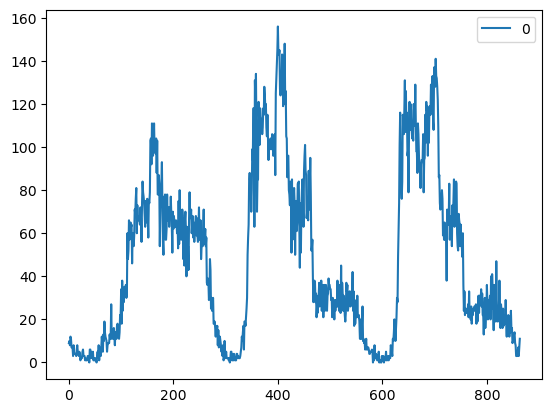

In [15]:
df.plot()

In [16]:
anomalies

Int64Index([245, 263, 429, 532, 777, 804, 808, 841], dtype='int64')

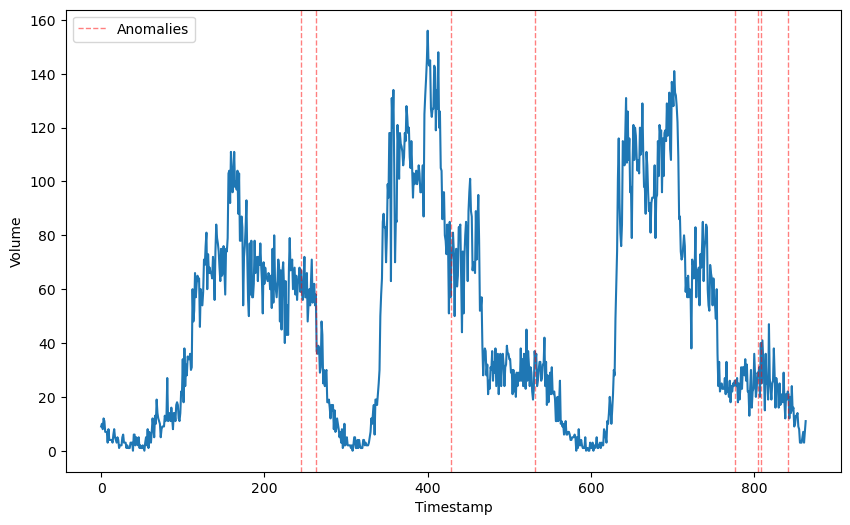

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df[0])

for i, time in enumerate(anomalies):
    if i == 0:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5, label="Anomalies")
    else:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5)


plt.xlabel("Timestamp")
plt.ylabel("Volume")
plt.legend()
plt.show()

## Anomaly scores from all the cameras

In [18]:
lambda_coef = 1.0
for camera_num in range(result.shape[1]):
    column_name = "ScoreCamera" + str(camera_num)
    if camera_num == 0:
        anomaly_score = pd.DataFrame([], columns=[column_name])
    s_G = pd.DataFrame(result[:, camera_num, 0].numpy())
    s_D = pd.DataFrame(result[:, camera_num, 1].numpy()) - pd.DataFrame(result[:, camera_num, 2].numpy())
    anomaly_score[column_name] = s_G + lambda_coef * s_D

/tmp/ipykernel_2698540/1616777280.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_score[column_name] = s_G + lambda_coef * s_D
/tmp/ipykernel_2698540/1616777280.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_score[column_name] = s_G + lambda_coef * s_D
/tmp/ipykernel_2698540/1616777280.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.

<Axes: >

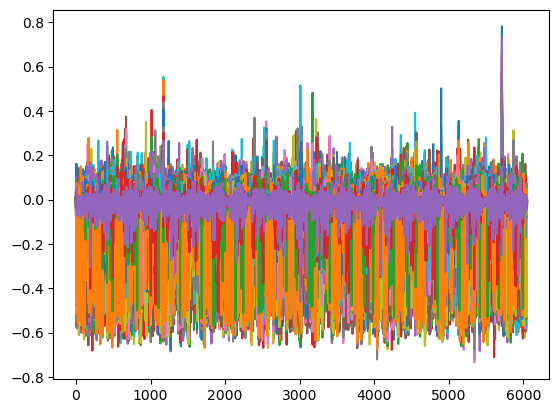

In [19]:
anomaly_score.plot(legend=False)

<Axes: title={'center': 'MSE loss'}>

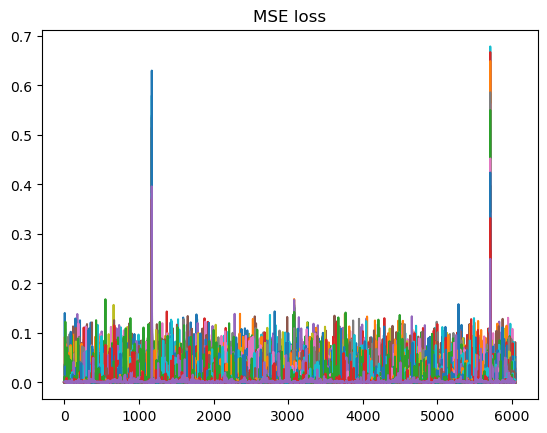

In [20]:
pd.DataFrame(result[:, :, 0].numpy()).plot(legend=False, title="MSE loss")

<Axes: title={'center': 'Real score'}>

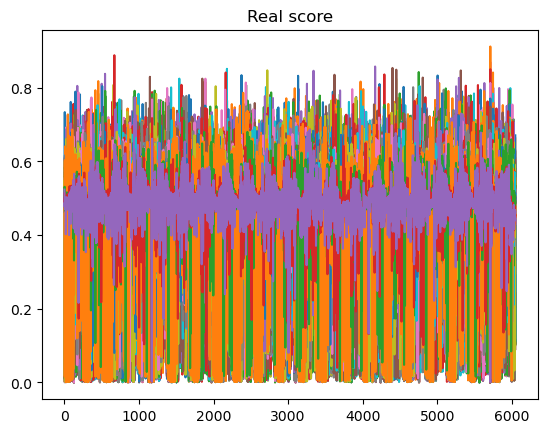

In [21]:
pd.DataFrame(result[:, :, 1].numpy()).plot(legend=False, title="Real score")

<Axes: title={'center': 'Fake score'}>

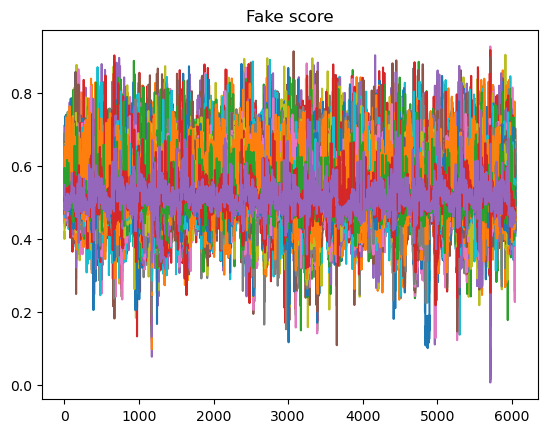

In [22]:
pd.DataFrame(result[:, :, 2].numpy()).plot(legend=False, title="Fake score")